### Imports

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df.head().style.background_gradient(cmap='turbo')

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.000000,1.000000,1.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000,18.000000,15.000000,1.000000,0.000000,9.000000,4.000000,3.000000
1,0.000000,0.000000,0.000000,0.000000,25.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,7.000000,6.000000,1.000000
2,0.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,0.000000,9.000000,4.000000,8.000000
3,0.000000,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,3.000000,6.000000
4,0.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,11.000000,5.000000,4.000000


### Features Description
**HighBP:** Indicates if the person has been told by a health professional that they have High Blood Pressure.
**HighChol:** Indicates if the person has been told by a health professional that they have High Blood Cholesterol.
**CholCheck:** Cholesterol Check, if the person has their cholesterol levels checked within the last 5 years.
**BMI:** Body Mass Index, calculated by dividing the person's weight (in kilogram) by the square of their height (in meters).
**Smoker:** Indicates if the person has smoked at least 100 cigarettes.
**Stroke:** Indicates if the person has a history of stroke.
**Diabetes:** Indicates if the person has a history of diabetes, or currently in pre-diabetes, or suffers from either type of diabetes.
**PhysActivity:** Indicates if the person has some form of physical activity in their day-to-day routine.
**Fruits:** Indicates if the person consumes one or more fruit(s) daily.
**Veggies:** Indicates if the person consumes one or more vegetable(s) daily.
**HvyAlcoholConsump:** Indicates if the person has more than 14 drinks per week.
**AnyHealthcare:** Indicates if the person has any form of health insurance.
**NoDocbcCost:** Indicates if the person wanted to visit a doctor within the past 1 year but couldn’t, due to cost.
**GenHlth:** Indicates the person's response to how well is their general health, ranging from 1 (excellent) to 5 (poor).
**MentHlth:** Indicates the number of days within the past 30 days that the person had bad mental health issue.
**PhysHlth:** Indicates the number of days within the past 30 days that the person had bad physical health.
**DiffWalk:** Indicates if the person has difficulty while walking or climbing stairs.
**Sex:** Indicates the gender of the person, where 0 is female and 1 is male.
**Age:** Indicates the age class of the person, where 1 is 18 years to 24 years up till 13 which is 80 years or older, each interval between has a 5-year increment.
**Education:** Indicates the highest year of school completed, with 0 being never attended or kindergarten only and six being having attended 4 years of college or more.
**Income:** Indicates the total household income, ranging from 1 (at least $10,000) to 6 ($75,000+)

In [3]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")
df.describe().T.style.background_gradient(cmap='turbo')

Number of rows: 253680
Number of columns: 22


,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.000000,0.094186,0.292087,0.000000,0.000000,0.000000,0.000000,1.000000
HighBP,253680.000000,0.429001,0.494934,0.000000,0.000000,0.000000,1.000000,1.000000
HighChol,253680.000000,0.424121,0.494210,0.000000,0.000000,0.000000,1.000000,1.000000
CholCheck,253680.000000,0.962670,0.189571,0.000000,1.000000,1.000000,1.000000,1.000000
BMI,253680.000000,28.382364,6.608694,12.000000,24.000000,27.000000,31.000000,98.000000
Smoker,253680.000000,0.443169,0.496761,0.000000,0.000000,0.000000,1.000000,1.000000
Stroke,253680.000000,0.040571,0.197294,0.000000,0.000000,0.000000,0.000000,1.000000
Diabetes,253680.000000,0.296921,0.698160,0.000000,0.000000,0.000000,0.000000,2.000000
PhysActivity,253680.000000,0.756544,0.429169,0.000000,1.000000,1.000000,1.000000,1.000000
Fruits,253680.000000,0.634256,0.481639,0.000000,0.000000,1.000000,1.000000,1.000000


### Features visualization

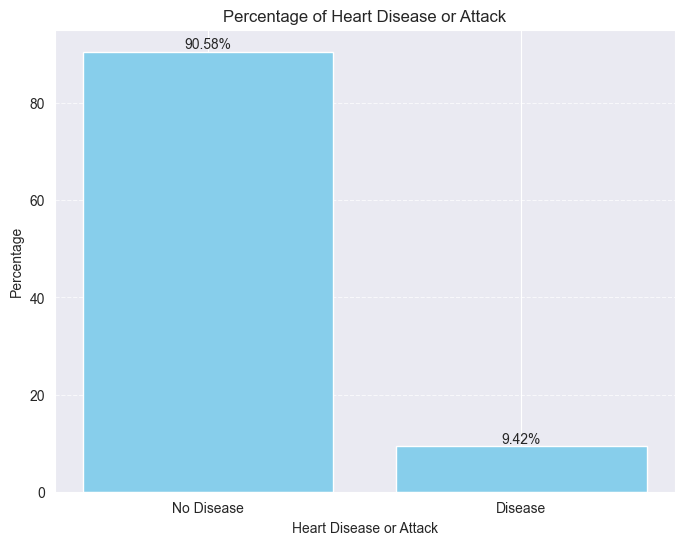

In [4]:
# Check for imbalanced in class distribution
heart_disease_counts = df['HeartDiseaseorAttack'].value_counts()

total_count = heart_disease_counts.sum()
percentage = (heart_disease_counts / total_count) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(percentage.index, percentage.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease or Attack')
plt.xlabel('Heart Disease or Attack')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The dataset is biased and will need resampling before training our model.

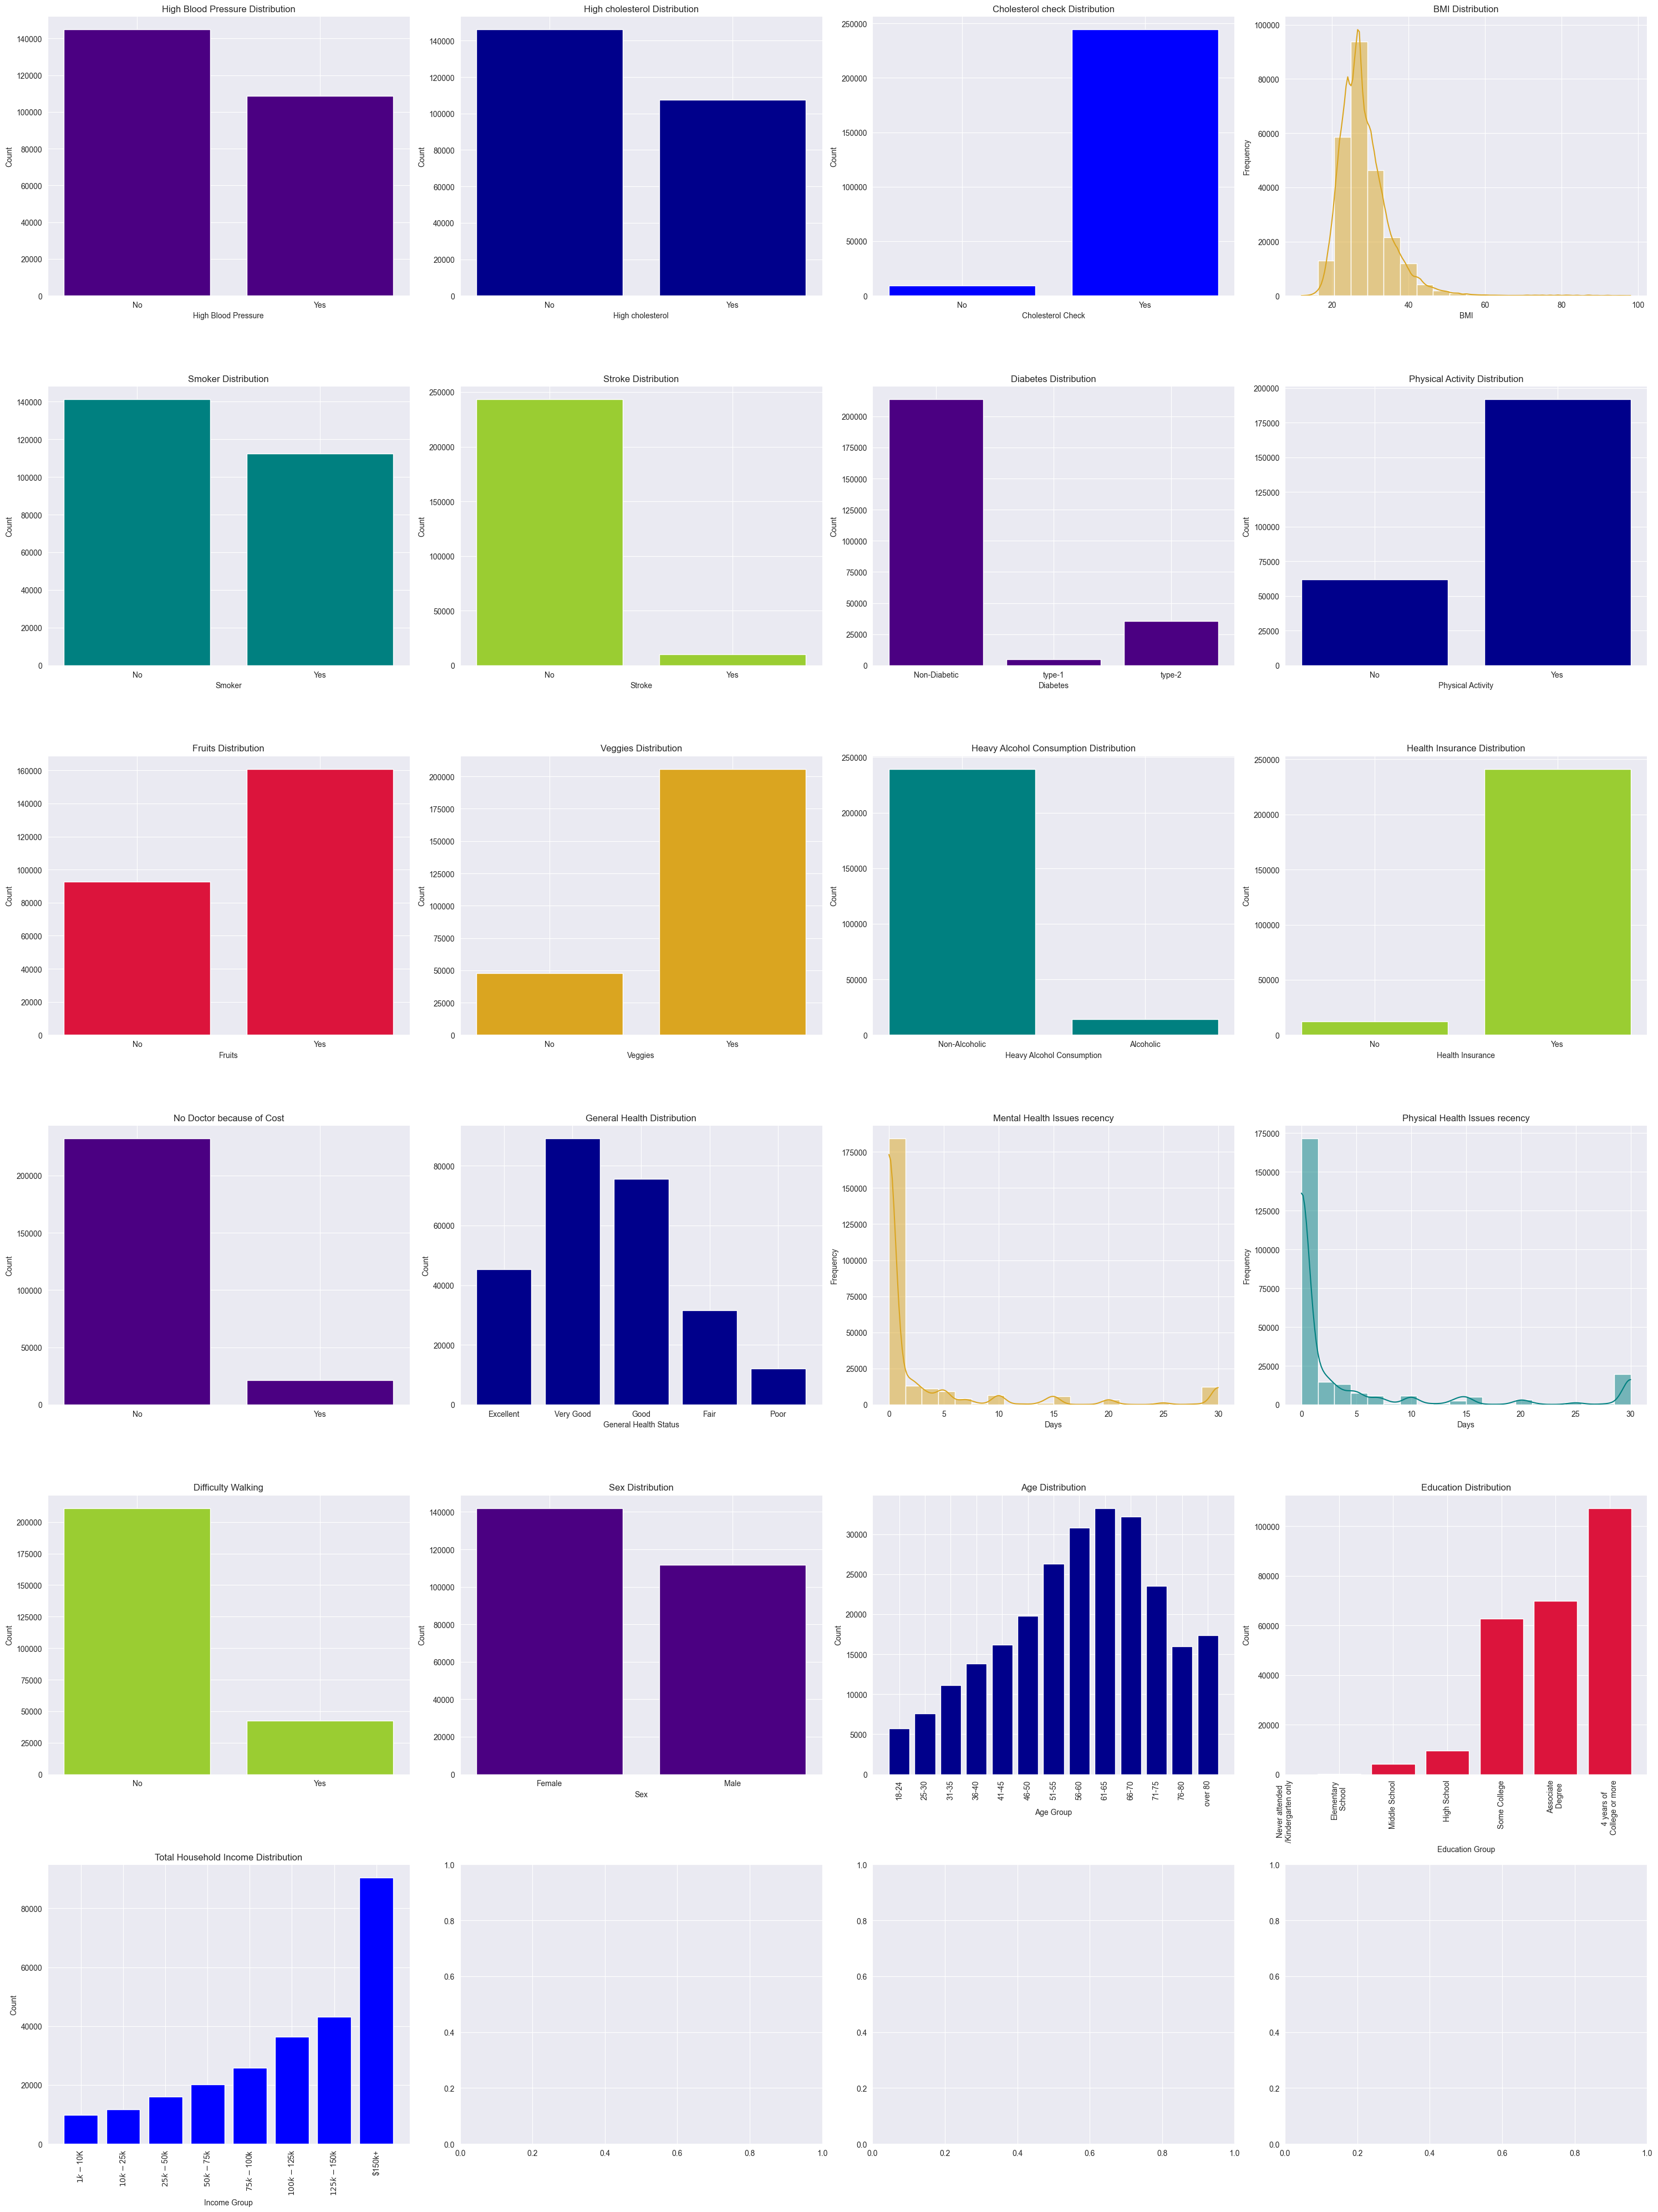

In [5]:
# Features Visualization

fig, axes = plt.subplots(6, 4, figsize=(30,40))

# High Blood Pressure Distribution
bp_counts = df['HighBP'].value_counts()
axes[0, 0].bar(bp_counts.index, bp_counts.values, color='indigo')
axes[0, 0].set_title('High Blood Pressure Distribution')
axes[0, 0].set_xlabel('High Blood Pressure')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['No', 'Yes'])

# High Cholesterol Distribution
chol_counts = df['HighChol'].value_counts()
axes[0, 1].bar(chol_counts.index, chol_counts.values, color='darkblue')
axes[0, 1].set_title('High cholesterol Distribution')
axes[0, 1].set_xlabel('High cholesterol')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No', 'Yes'])

# Cholesterol Check Distribution
CholCheck_counts = df['CholCheck'].value_counts()
axes[0, 2].bar(CholCheck_counts.index, CholCheck_counts.values, color='blue')
axes[0, 2].set_title('Cholesterol check Distribution')
axes[0, 2].set_xlabel('Cholesterol Check')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_xticks([0, 1])
axes[0, 2].set_xticklabels(['No', 'Yes'])

# BMI Distribution
sns.histplot(data=df, x='BMI', bins=20, kde=True, color='goldenrod', ax=axes[0, 3])
axes[0, 3].set_title('BMI Distribution')
axes[0, 3].set_xlabel('BMI')
axes[0, 3].set_ylabel('Frequency')

# Smoker Distribution
Smoker_counts = df['Smoker'].value_counts()
axes[1, 0].bar(Smoker_counts.index, Smoker_counts.values, color='teal')
axes[1, 0].set_title('Smoker Distribution')
axes[1, 0].set_xlabel('Smoker')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No', 'Yes'])

# Stroke Distribution
Stroke_counts = df['Stroke'].value_counts()
axes[1, 1].bar(Stroke_counts.index, Stroke_counts.values, color='yellowgreen')
axes[1, 1].set_title('Stroke Distribution')
axes[1, 1].set_xlabel('Stroke')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['No', 'Yes'])

# Diabetes Distribution
Diabetes_counts = df['Diabetes'].value_counts()
axes[1, 2].bar(Diabetes_counts.index, Diabetes_counts.values, color='indigo')
axes[1, 2].set_title('Diabetes Distribution')
axes[1, 2].set_xlabel('Diabetes')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_xticks([0, 1, 2])
axes[1, 2].set_xticklabels(['Non-Diabetic', 'type-1', 'type-2'])

# Physical Activity Distribution
PhysActivity_counts = df['PhysActivity'].value_counts()
axes[1, 3].bar(PhysActivity_counts.index, PhysActivity_counts.values, color='darkblue')
axes[1, 3].set_title('Physical Activity Distribution')
axes[1, 3].set_xlabel('Physical Activity')
axes[1, 3].set_ylabel('Count')
axes[1, 3].set_xticks([0, 1])
axes[1, 3].set_xticklabels(['No', 'Yes'])

# Fruits Distribution
Fruits_counts = df['Fruits'].value_counts()
axes[2, 0].bar(Fruits_counts.index, Fruits_counts.values, color='crimson')
axes[2, 0].set_title('Fruits Distribution')
axes[2, 0].set_xlabel('Fruits')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_xticks([0, 1])
axes[2, 0].set_xticklabels(['No', 'Yes'])

# Veggies Distribution
Veggies_counts = df['Veggies'].value_counts()
axes[2, 1].bar(Veggies_counts.index, Veggies_counts.values, color='goldenrod')
axes[2, 1].set_title('Veggies Distribution')
axes[2, 1].set_xlabel('Veggies')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_xticks([0, 1])
axes[2, 1].set_xticklabels(['No', 'Yes'])

# Heavy Alcohol Consumption Distribution
HvyAlcoholConsump_counts = df['HvyAlcoholConsump'].value_counts()
axes[2, 2].bar(HvyAlcoholConsump_counts.index, HvyAlcoholConsump_counts.values, color='teal')
axes[2, 2].set_title('Heavy Alcohol Consumption Distribution')
axes[2, 2].set_xlabel('Heavy Alcohol Consumption')
axes[2, 2].set_ylabel('Count')
axes[2, 2].set_xticks([0, 1])
axes[2, 2].set_xticklabels(['Non-Alcoholic', 'Alcoholic'])

# Health Insurance Distribution
AnyHealthcare_counts = df['AnyHealthcare'].value_counts()
axes[2, 3].bar(AnyHealthcare_counts.index, AnyHealthcare_counts.values, color='yellowgreen')
axes[2, 3].set_title('Health Insurance Distribution')
axes[2, 3].set_xlabel('Health Insurance')
axes[2, 3].set_ylabel('Count')
axes[2, 3].set_xticks([0, 1])
axes[2, 3].set_xticklabels(['No', 'Yes'])

# No Doctor because of Cost
NoDocbcCost_counts = df['NoDocbcCost'].value_counts()
axes[3, 0].bar(NoDocbcCost_counts.index, NoDocbcCost_counts.values, color='indigo')
axes[3, 0].set_title('No Doctor because of Cost')
axes[3, 0].set_ylabel('Count')
axes[3, 0].set_xticks([0, 1])
axes[3, 0].set_xticklabels(['No', 'Yes'])

# General Health Distribution
GenHlth_counts = df['GenHlth'].value_counts()
axes[3, 1].bar(GenHlth_counts.index, GenHlth_counts.values, color='darkblue')
axes[3, 1].set_title('General Health Distribution')
axes[3, 1].set_xlabel('General Health Status')
axes[3, 1].set_ylabel('Count')
axes[3, 1].set_xticks([1, 2, 3, 4, 5])
axes[3, 1].set_xticklabels(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])

# Mental Health Issues recency
sns.histplot(data=df, x='MentHlth', bins=20, kde=True, color='goldenrod', ax=axes[3, 2])
axes[3, 2].set_title('Mental Health Issues recency')
axes[3, 2].set_xlabel('Days')
axes[3, 2].set_ylabel('Frequency')

# Physical Health Issues recency
sns.histplot(data=df, x='PhysHlth', bins=20, kde=True, color='teal', ax=axes[3, 3])
axes[3, 3].set_title('Physical Health Issues recency')
axes[3, 3].set_xlabel('Days')
axes[3, 3].set_ylabel('Frequency')

# Difficulty Walking Distribution
DiffWalk_counts = df['DiffWalk'].value_counts()
axes[4, 0].bar(DiffWalk_counts.index, DiffWalk_counts.values, color='yellowgreen')
axes[4, 0].set_title('Difficulty Walking')
axes[4, 0].set_ylabel('Count')
axes[4, 0].set_xticks([0, 1])
axes[4, 0].set_xticklabels(['No', 'Yes'])

# Sex Distribution
Sex_counts = df['Sex'].value_counts()
axes[4, 1].bar(Sex_counts.index, Sex_counts.values, color='indigo')
axes[4, 1].set_title('Sex Distribution')
axes[4, 1].set_xlabel('Sex')
axes[4, 1].set_ylabel('Count')
axes[4, 1].set_xticks([0, 1])
axes[4, 1].set_xticklabels(['Female', 'Male'])

# Age Distribution
Age_counts = df['Age'].value_counts()
axes[4, 2].bar(Age_counts.index, Age_counts.values, color='darkblue')
axes[4, 2].set_title('Age Distribution')
axes[4, 2].set_xlabel('Age Group')
axes[4, 2].set_ylabel('Count')
axes[4, 2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
axes[4, 2].set_xticklabels(['18-24', '25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', 'over 80'], rotation=90)

# Education Distribution
Education_counts = df['Education'].value_counts()
axes[4, 3].bar(Education_counts.index, Education_counts.values, color='crimson')
axes[4, 3].set_title('Education Distribution')
axes[4, 3].set_xlabel('Education Group')
axes[4, 3].set_ylabel('Count')
axes[4, 3].set_xticks([0, 1, 2, 3, 4, 5, 6])
axes[4, 3].set_xticklabels(['Never attended\n/Kindergarten only', 'Elementary\n School', 'Middle School', 'High School', 'Some College', 'Associate\n Degree', '4 years of\n College or more'], rotation=90)

# Total Household Income Distribution
Income_counts = df['Income'].value_counts()
axes[5, 0].bar(Income_counts.index, Income_counts.values, color='blue')
axes[5, 0].set_title('Total Household Income Distribution')
axes[5, 0].set_xlabel('Income Group')
axes[5, 0].set_ylabel('Count')
axes[5, 0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
axes[5, 0].set_xticklabels(['$1k-$10K', '$10k-$25k', '$25k-$50k', '$50k-$75k', '$75k-$100k', '$100k-$125k', '$125k-$150k', '$150k+'], rotation=90)

plt.tight_layout()
plt.show()

### Data Preprocessing

In [6]:
# Check for missing values
for col in df:
    print(f"{col} missing value percentage: {round(df[col].isnull().sum() * 100 / len(df), 2)}")

HeartDiseaseorAttack missing value percentage: 0.0
HighBP missing value percentage: 0.0
HighChol missing value percentage: 0.0
CholCheck missing value percentage: 0.0
BMI missing value percentage: 0.0
Smoker missing value percentage: 0.0
Stroke missing value percentage: 0.0
Diabetes missing value percentage: 0.0
PhysActivity missing value percentage: 0.0
Fruits missing value percentage: 0.0
Veggies missing value percentage: 0.0
HvyAlcoholConsump missing value percentage: 0.0
AnyHealthcare missing value percentage: 0.0
NoDocbcCost missing value percentage: 0.0
GenHlth missing value percentage: 0.0
MentHlth missing value percentage: 0.0
PhysHlth missing value percentage: 0.0
DiffWalk missing value percentage: 0.0
Sex missing value percentage: 0.0
Age missing value percentage: 0.0
Education missing value percentage: 0.0
Income missing value percentage: 0.0


In [7]:
# Scaling features
scaler = MinMaxScaler()
df[['Diabetes', 'BMI', 'Income', 'Education', 'GenHlth', 'PhysHlth', 'MentHlth', 'Age']] = scaler.fit_transform(df[['Diabetes', 'BMI', 'Income', 'Education', 'GenHlth', 'PhysHlth', 'MentHlth', 'Age']])

In [8]:
# Resampling classes to balance the data
majority_class = df[df['HeartDiseaseorAttack'] == 0]
minority_class = df[df['HeartDiseaseorAttack'] == 1]

downsampled_majority = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
df = pd.concat([downsampled_majority, minority_class])

print('Heart Disease Classes count:\n', df['HeartDiseaseorAttack'].value_counts())

Heart Disease Classes count:
 HeartDiseaseorAttack
0.0    23893
1.0    23893
Name: count, dtype: int64


In [9]:
# Calculating the correlation between features and target variable
correlation_matrix = df.corr()
target_correlation = correlation_matrix['HeartDiseaseorAttack'].drop('HeartDiseaseorAttack')
target_correlation_sorted = target_correlation.abs().sort_values(ascending=False)

print(f"Correlation between each column and the target variable (descending order): {target_correlation_sorted * 100}")

Correlation between each column and the target variable (descending order): GenHlth              41.224165
Age                  39.737758
HighBP               36.423888
HighChol             30.835776
DiffWalk             30.581996
PhysHlth             25.938245
Diabetes             25.523643
Stroke               23.294389
Income               23.269386
Smoker               19.825697
Education            16.685564
PhysActivity         14.673707
Sex                  14.322233
MentHlth              9.769131
BMI                   9.499770
CholCheck             9.244862
Veggies               6.729922
HvyAlcoholConsump     5.785064
NoDocbcCost           5.142160
AnyHealthcare         3.675372
Fruits                2.895396
Name: HeartDiseaseorAttack, dtype: float64


In [10]:
# Splitting the data into features and target variable
# Removing weakly correlated features
X = df.drop(['HeartDiseaseorAttack', 'MentHlth', 'BMI', 'CholCheck', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'AnyHealthcare', 'Fruits'], axis=1)
y = df['HeartDiseaseorAttack']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Artificial Neural Network (ANN)
* Converting data to tensor format.
* Dividing the data into batches for cross-validation.
* Defining network architecture with the appropriate activations.
* Choosing the appropriate loss function and optimization algorithm.
* Training the model on the training set.
* Evaluating the model using different metrics and visualizing the results.
* Predicting survival status of new examples in the test set.

In [11]:
# Convert NumPy arrays to TensorFlow tensors
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tensor, y_test_tensor))

# Shuffle and batch the datasets
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Define the neural network architecture
ann_classifier = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001))
])

# Compile the model
ann_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_classifier.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluate the model
test_loss, test_accuracy = ann_classifier.evaluate(test_dataset)
print("Test Accuracy:", test_accuracy)

# Make predictions
y_pred_probabilities = ann_classifier.predict(test_dataset)
y_pred_ann = (y_pred_probabilities > 0.5).astype(int)

Epoch 1/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7459 - loss: 1.3395 - val_accuracy: 0.7682 - val_loss: 0.5902
Epoch 2/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7668 - loss: 0.5793 - val_accuracy: 0.7719 - val_loss: 0.5627
Epoch 3/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7685 - loss: 0.5582 - val_accuracy: 0.7629 - val_loss: 0.5671
Epoch 4/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7720 - loss: 0.5469 - val_accuracy: 0.7720 - val_loss: 0.5473
Epoch 5/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7708 - loss: 0.5435 - val_accuracy: 0.7689 - val_loss: 0.5440
Epoch 6/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7679 - loss: 0.5387 - val_accuracy: 0.7716 - val_loss: 0.5386
Epoch 7/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7688 - loss: 0.5346 - val_accuracy: 0.7684 - val_loss: 0.5407
Epoch 8/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7691 - loss: 0.5336 - 

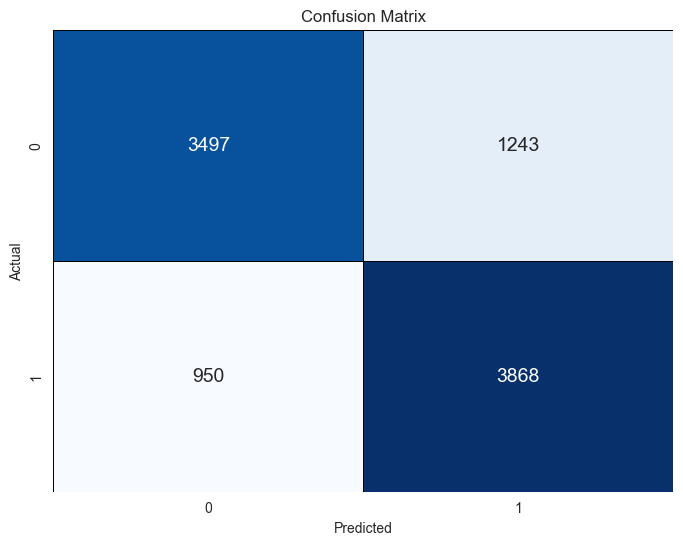


Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      4740
         1.0       0.76      0.80      0.78      4818

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558



In [12]:
# Compute confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_ann))